In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check missing value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Encoding
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Since Species is dependent variable, hence, we only have to do label encoder and not one hot encoder
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# split the data into ind and dep variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [ ]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [ ]:
y_test

33     0
16     0
43     0
129    2
50     1
123    2
68     1
53     1
146    2
1      0
147    2
32     0
31     0
122    2
127    2
74     1
88     1
96     1
42     0
134    2
80     1
48     0
90     1
65     1
97     1
64     1
93     1
114    2
25     0
41     0
104    2
89     1
116    2
82     1
112    2
55     1
86     1
61     1
Name: Species, dtype: int8

# Part 1 - Logistic regression with ~OVR

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class='ovr') # one vs rest
logit.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
# predict train and test
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [ ]:
y_pred_train

array([1, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1], dtype=int8)

In [ ]:
y_train

94     1
135    2
21     0
22     0
29     0
      ..
63     1
70     1
81     1
11     0
95     1
Name: Species, Length: 112, dtype: int8

In [ ]:
# Evaluate the model accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[40  0  0]
 [ 0 27  6]
 [ 0  2 37]]
********************************************************************************
[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]


In [ ]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.82      0.87        33
           2       0.86      0.95      0.90        39

    accuracy                           0.93       112
   macro avg       0.93      0.92      0.92       112
weighted avg       0.93      0.93      0.93       112

********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
print(accuracy_score(y_train, y_pred_train))
print("****************"*5)
print(accuracy_score(y_test, y_pred_test))

0.9285714285714286
********************************************************************************
1.0


# Part 2 - LogisticRegression with ~multinomial

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(multi_class='multinomial') # one vs rest
logit.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
# predict train and test
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train))
print("****************"*5)
print(accuracy_score(y_test, y_pred_test))

0.9642857142857143
********************************************************************************
1.0


In [ ]:
# Cross Validation Method
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(logit, x_test, y_test, cv=10)
print(test_accuracy.mean())

1.0


# DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict train and test
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_dt))
print("****************"*5)
print(accuracy_score(y_test, y_pred_test_dt))

1.0
********************************************************************************
0.9736842105263158


In [ ]:
from sklearn.tree import plot_tree

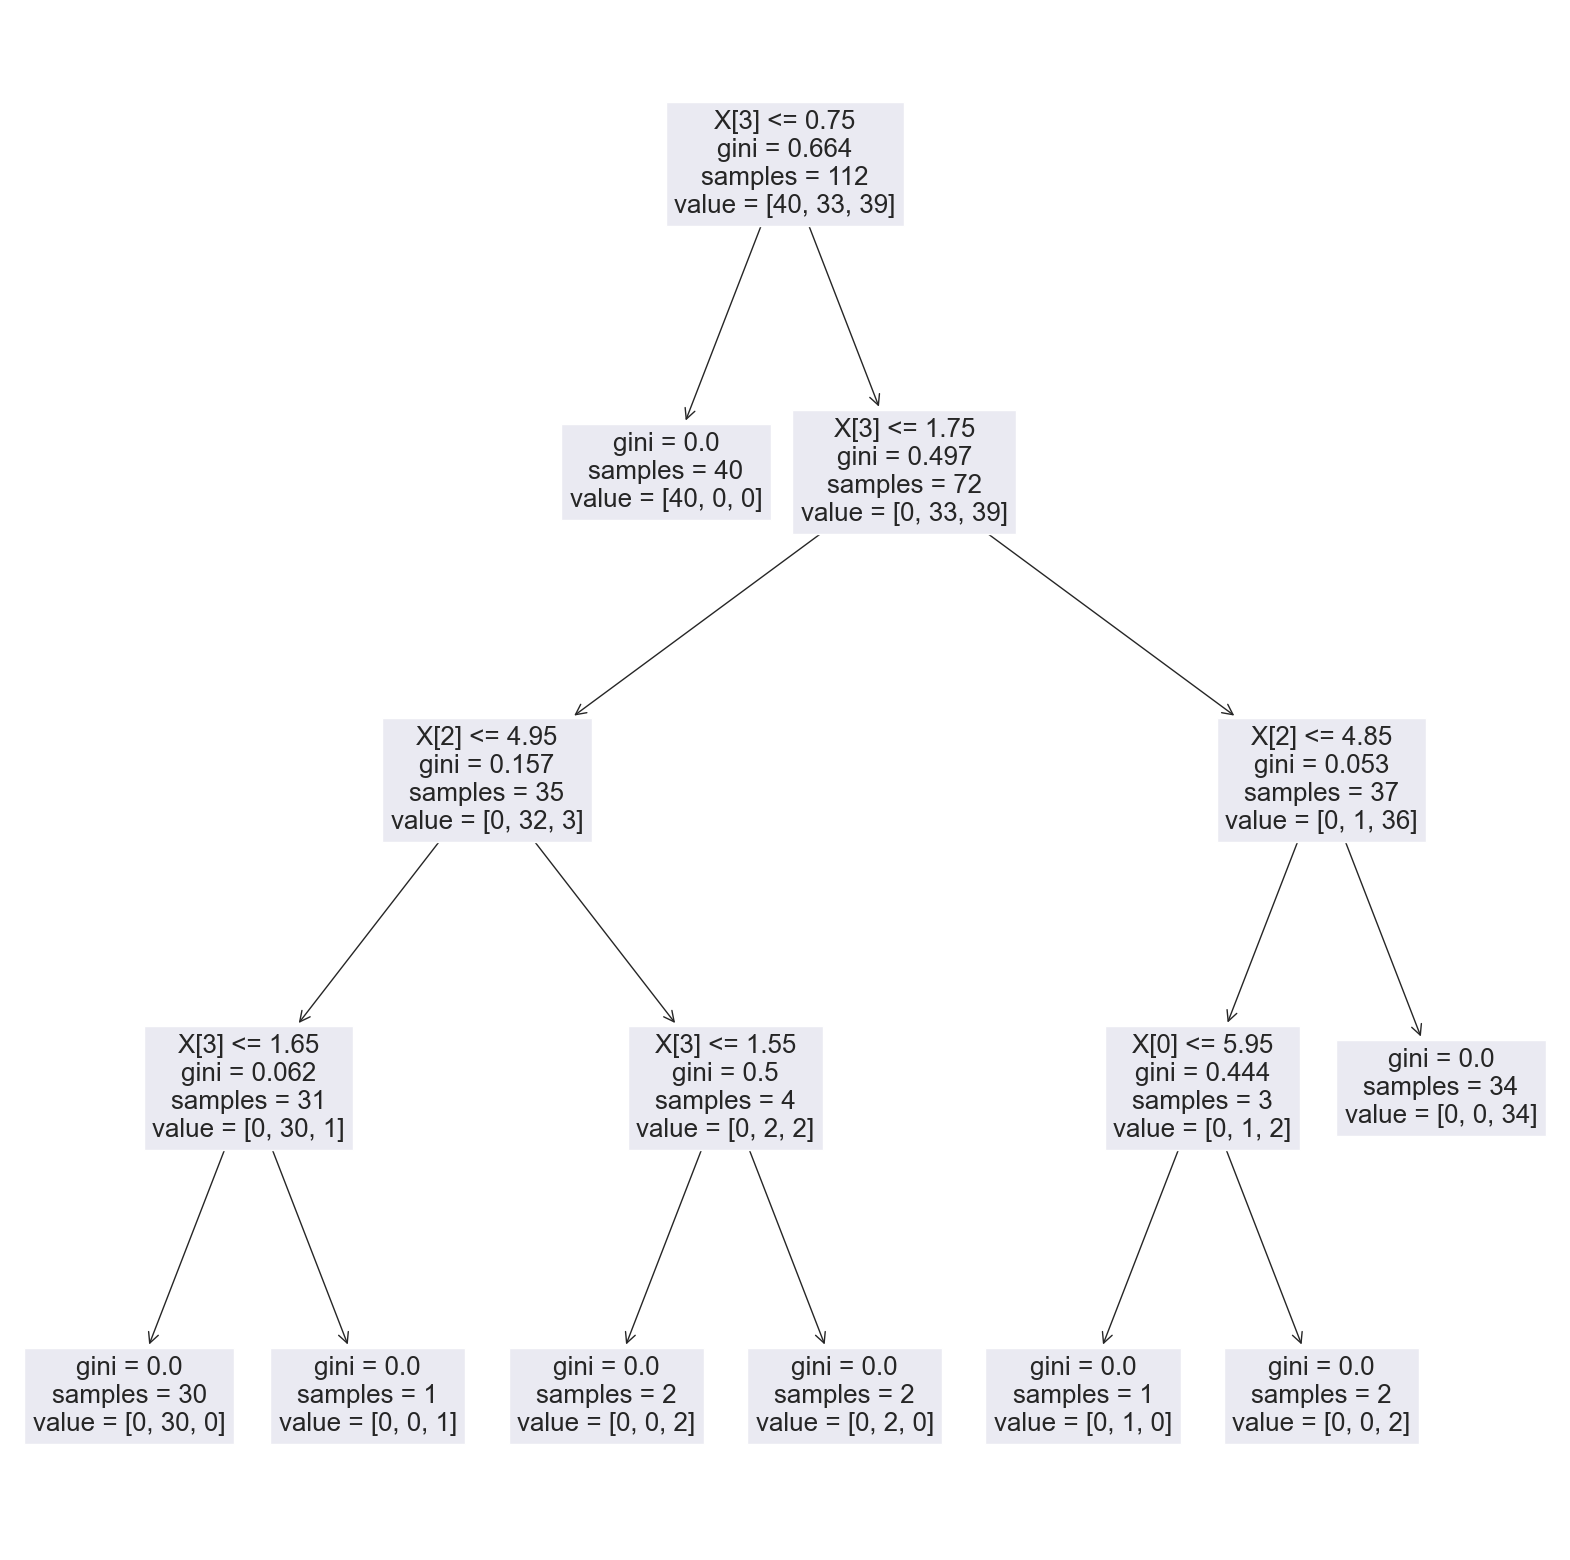

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(dtree)
plt.show()

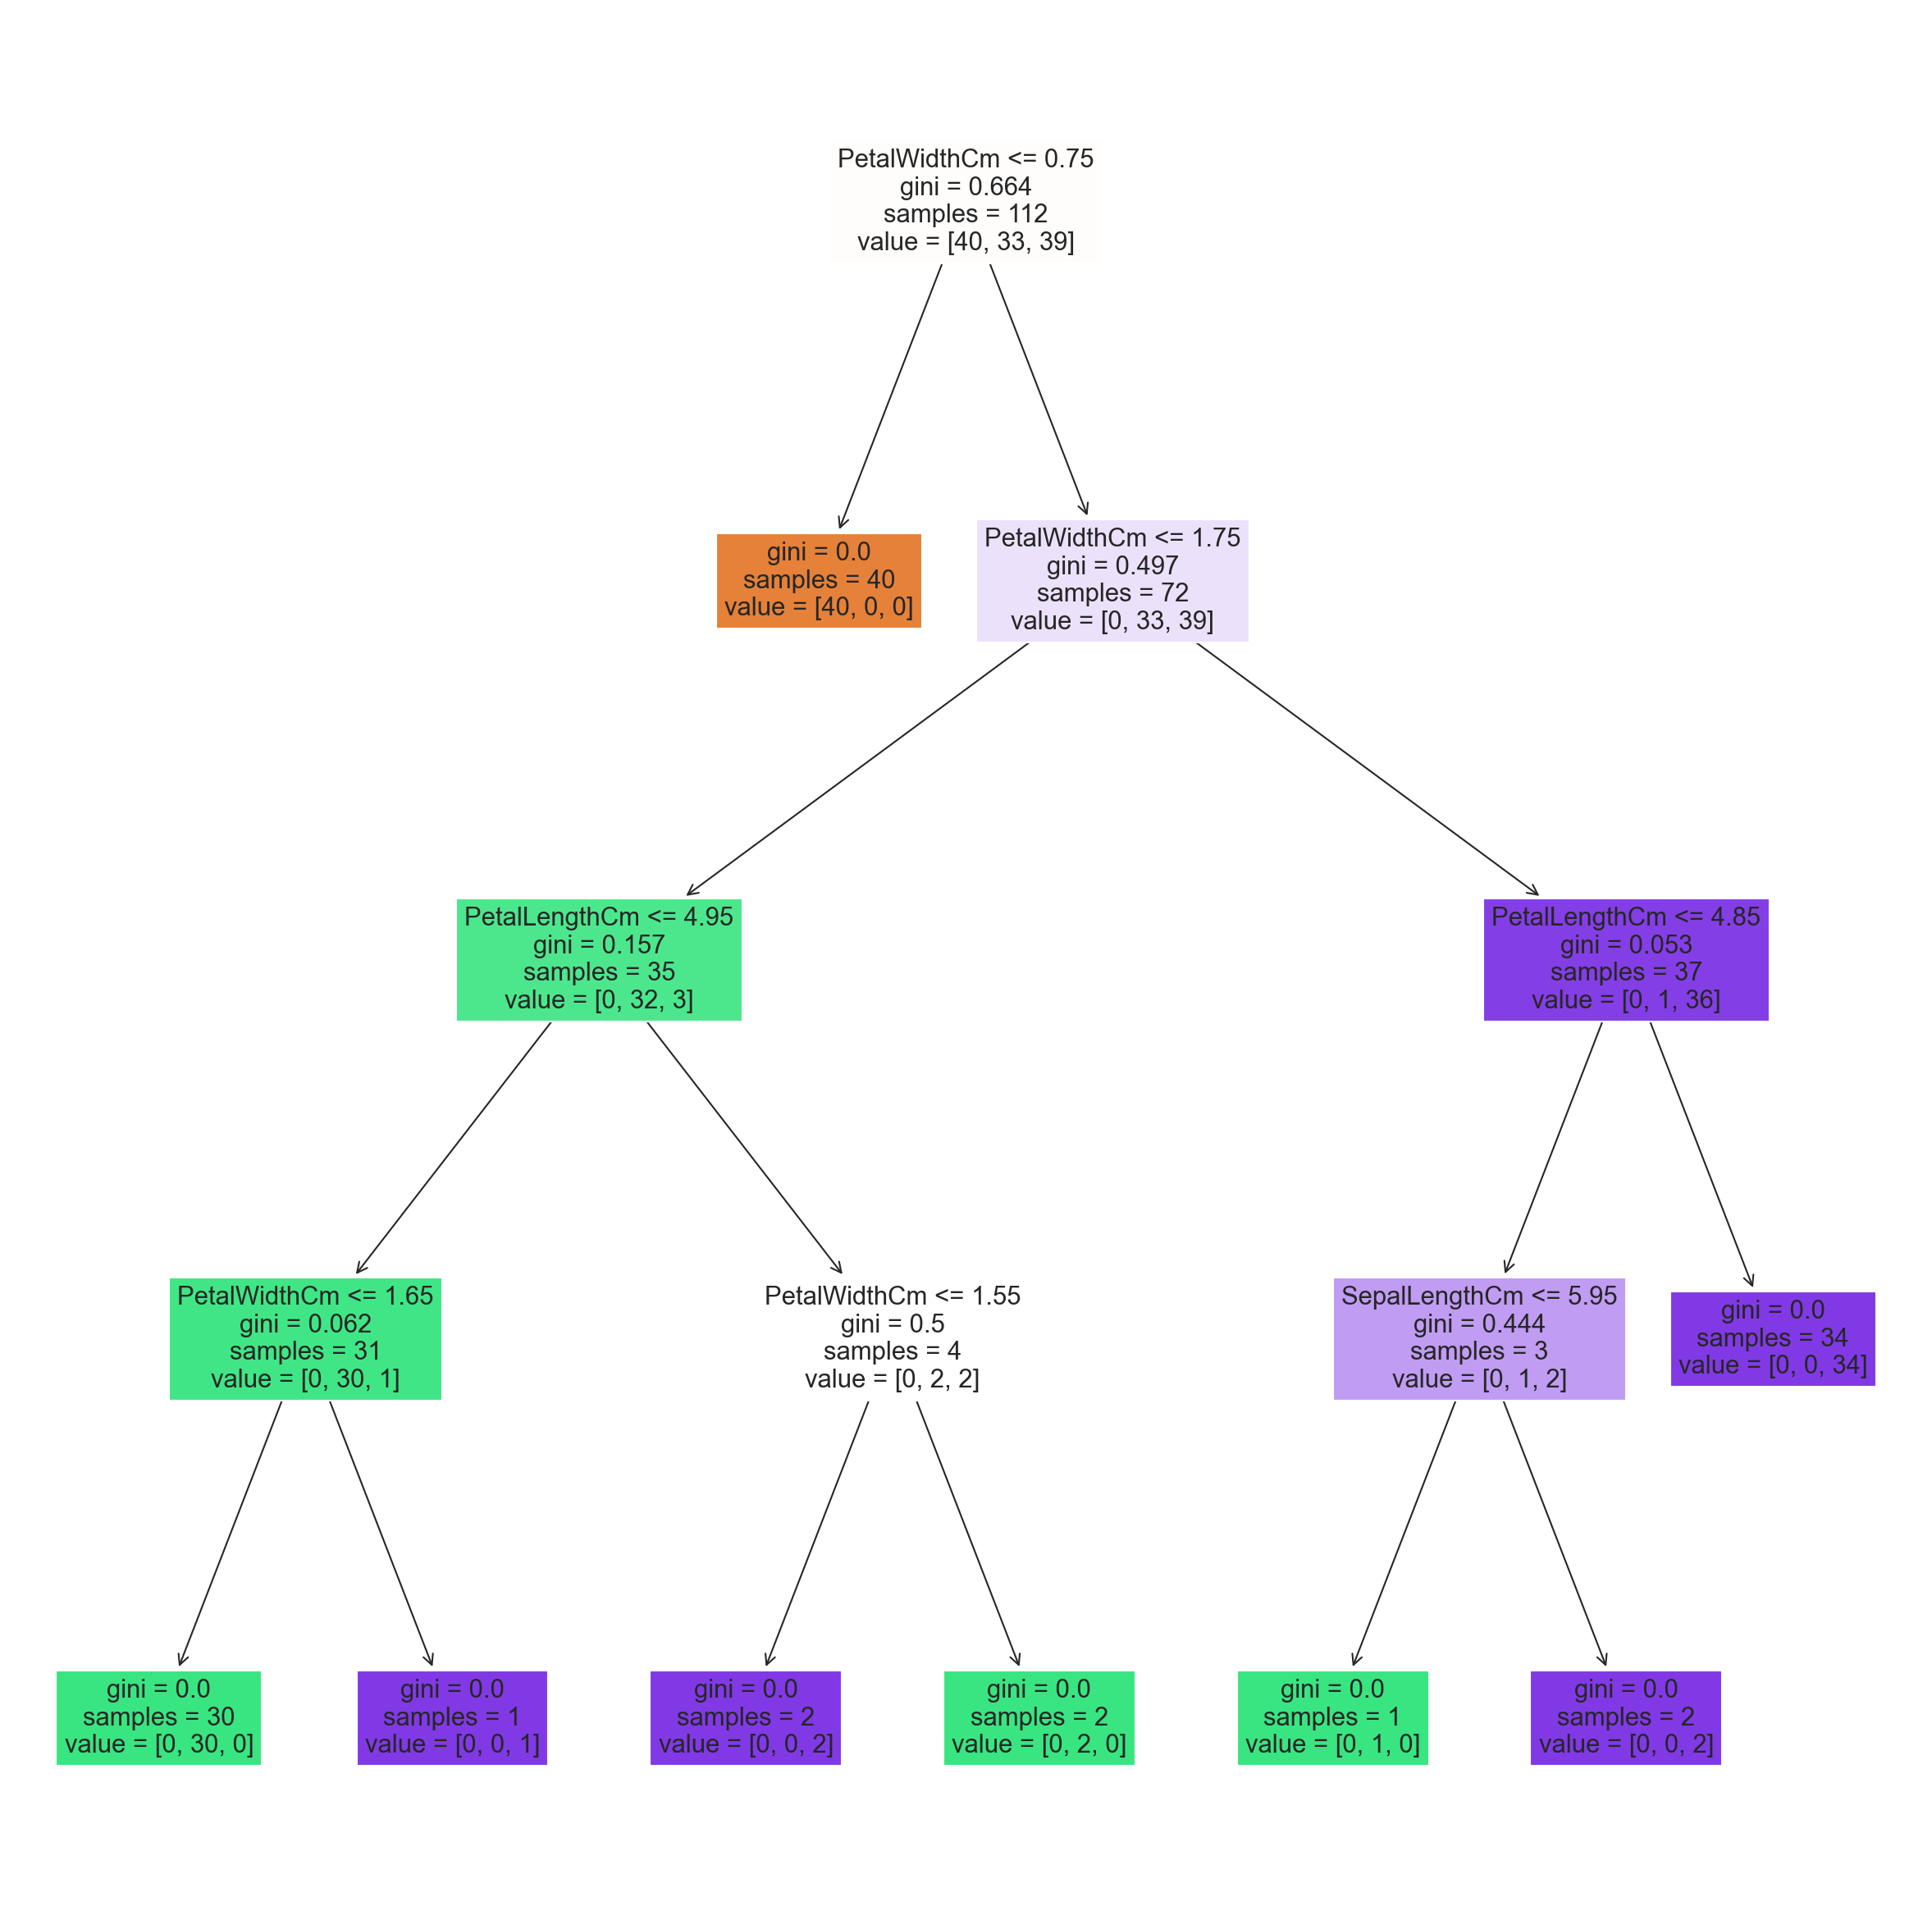

In [ ]:
plt.figure(figsize=(20,20), dpi=150)
plot_tree(dtree, filled=True, feature_names=x.columns)
plt.show()

# Feature importance

In [ ]:
dtree.feature_importances_

array([0.        , 0.01791857, 0.54862472, 0.43345671])

In [ ]:
pd.DataFrame(index=x.columns, data=dtree.feature_importances_, columns=['Feature Importance'])

,Feature Importance
SepalLengthCm,0.000000
SepalWidthCm,0.017919
PetalLengthCm,0.548625
PetalWidthCm,0.433457


In [ ]:
0.548625+0.433457

0.982082

# Prunning the tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 2) # Hyperparam tuning in DT
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# predict train and test
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_dt))
print("****************"*5)
print(accuracy_score(y_test, y_pred_test_dt))

0.9642857142857143
********************************************************************************
0.9473684210526315


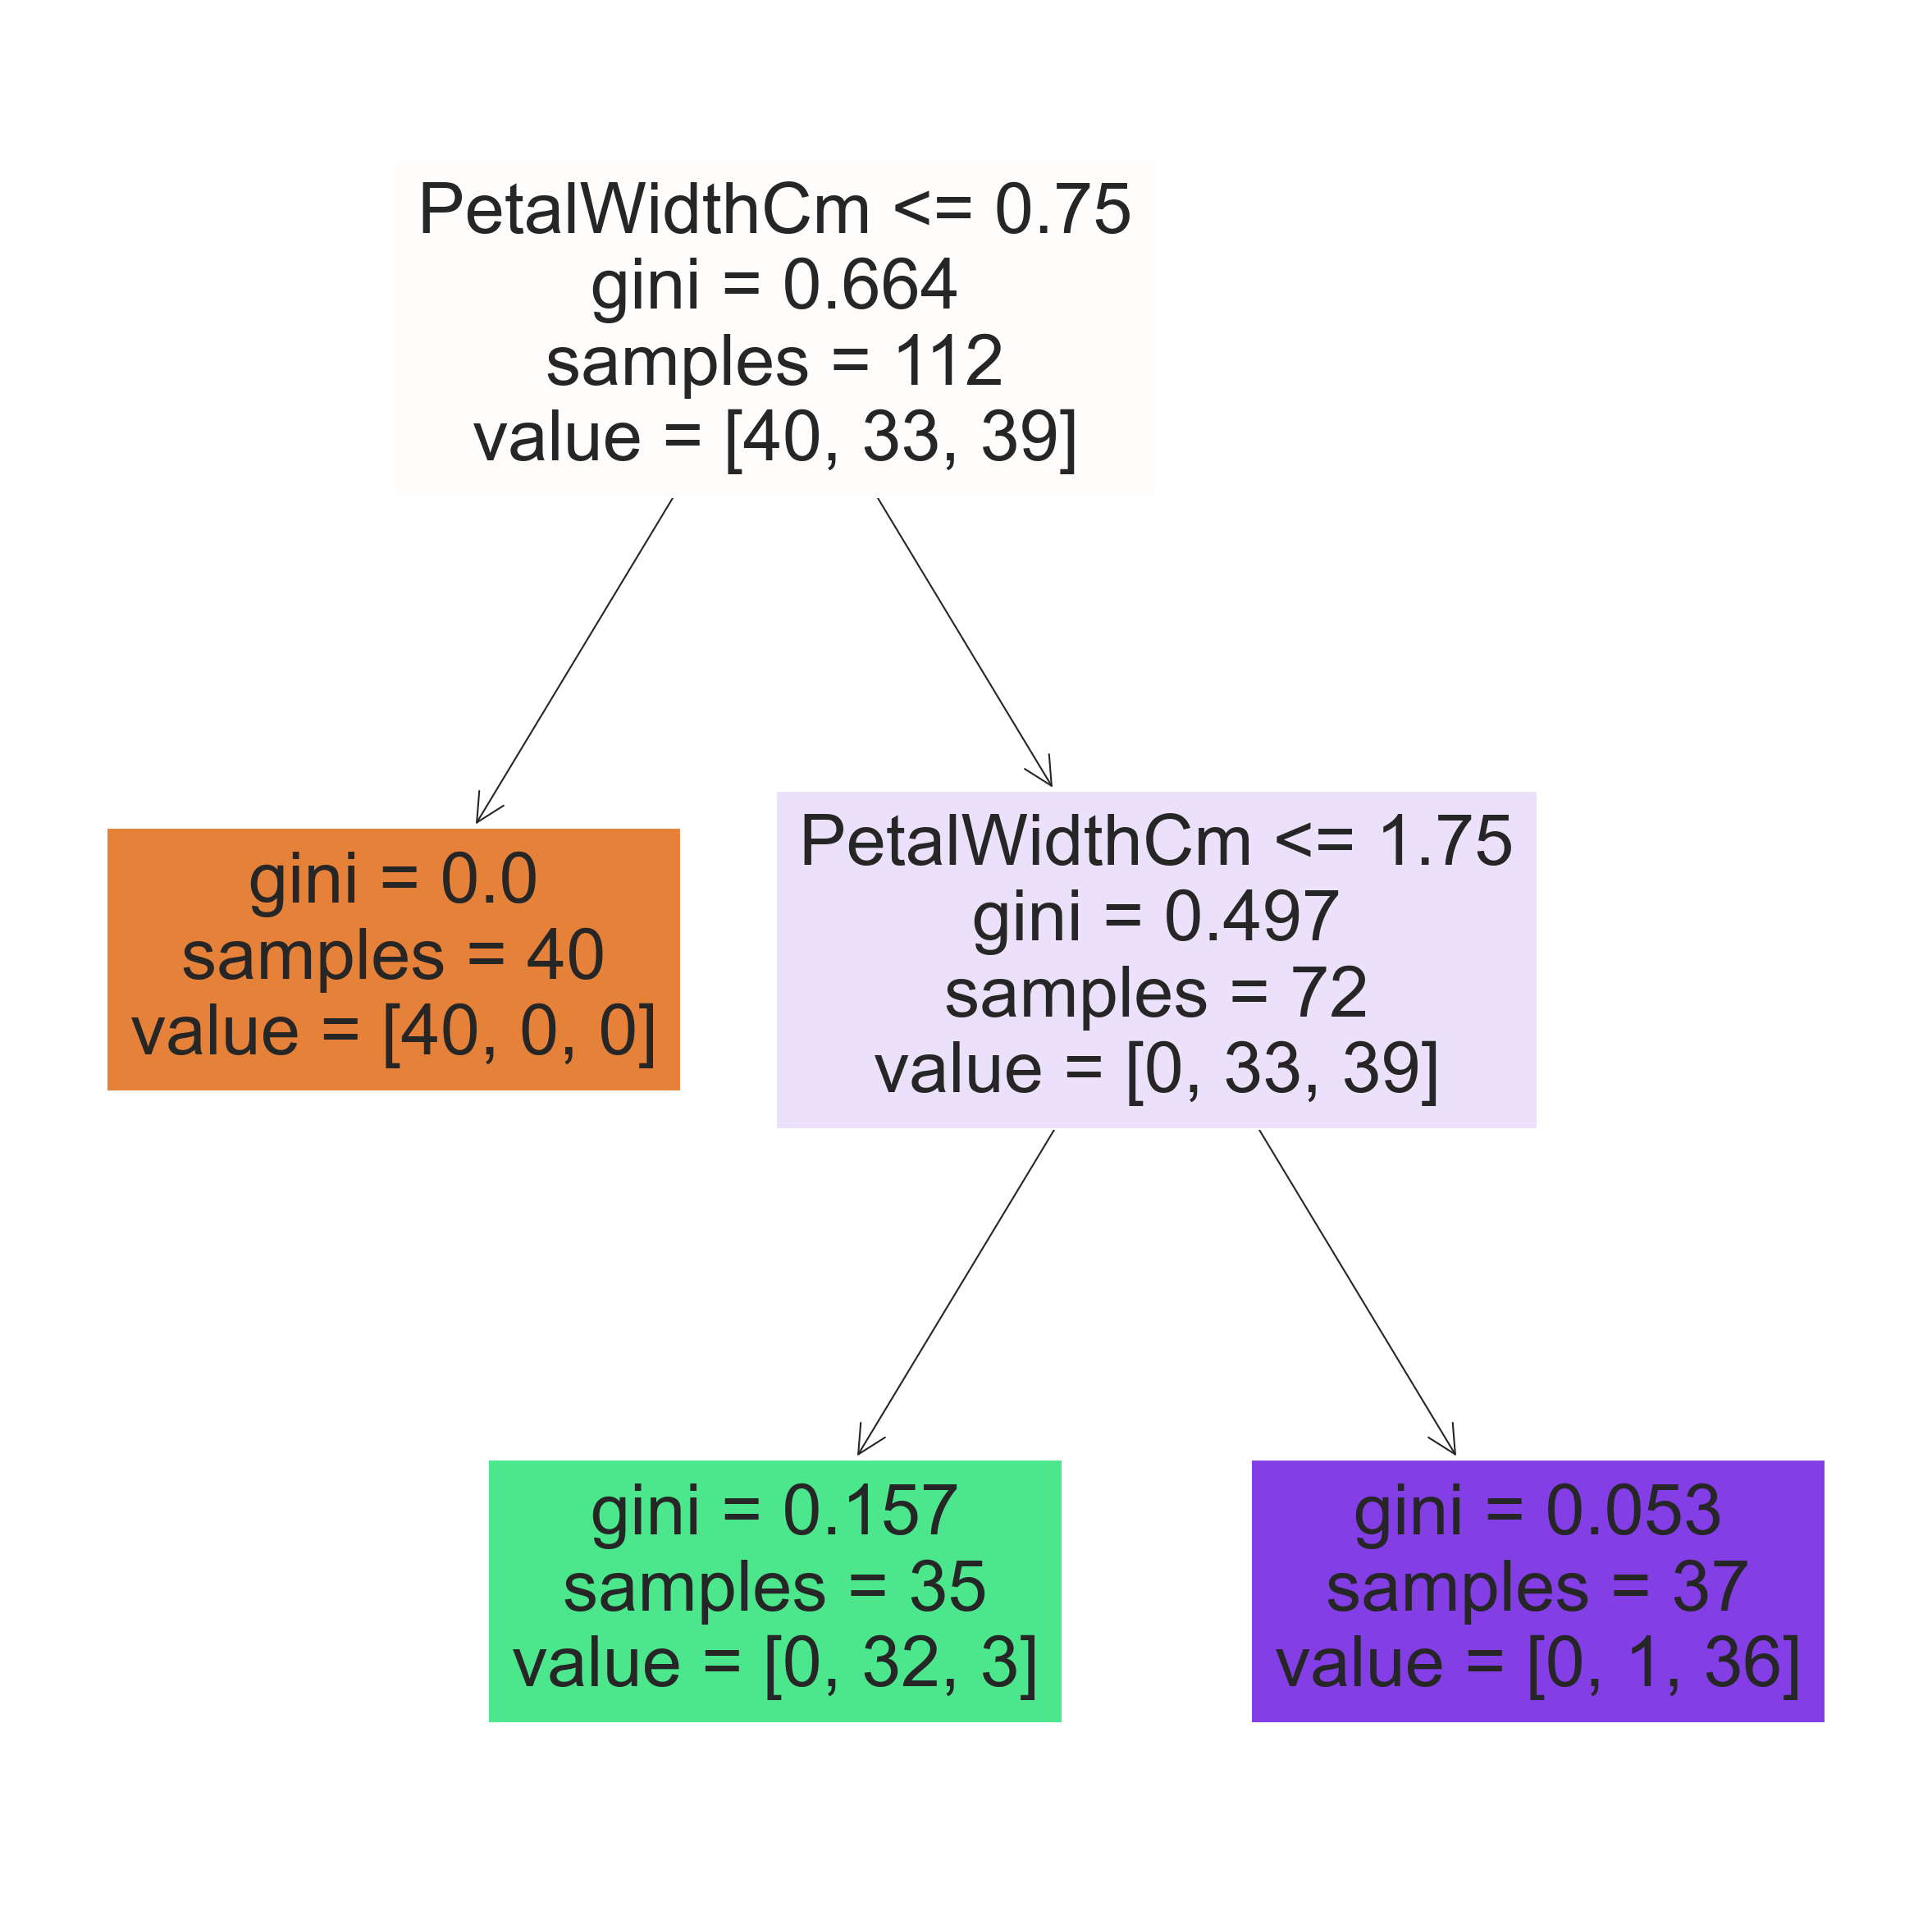

In [ ]:
plt.figure(figsize=(20,20), dpi=150)
plot_tree(dtree, filled=True, feature_names=x.columns)
plt.show()